In [4]:
# Se cargan las librerías que se van a utilizar
import math
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
#import mlxtend
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import warnings

from sklearn import metrics
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

In [5]:
# Se carga la base de datos
df = pd.read_csv('T2_zoo.csv') #Se encuentra en la misma carpeta que el jupyter notebook
print(df.shape) #Se tienen 101 renglones y 18 columnas

(101, 18)


In [6]:
## 2) ANÁLISIS EXPLORATORIO
# Se realiza una descripción analítica de los datos.
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Se cuenta con el registro de 101 animales con 18 caracteristicas que cuentan cada uno de ellos, entre ellos vemos:

__animal name:__ El nombre del animal

__hair:__ Si tiene pelo o no (1= si 0= no)

__feathers:__ Si tiene plumas (1= si 0= no)

__eggs:__ Si es oviparo (1= si 0= no)

__milk:__ Si es un mamifero (1= si 0= no)

__airborne:__ Si es aereo (1= si 0= no)

__aquatic:__ Si es acuatico (1= si 0= no)

__predator:__ Si es un depredador (1= si 0= no)

__toothed:__ Si tiene dentadura (1= si 0= no)

__backbone:__ Si tiene espina dorsal (1= si 0= no)

__breathes:__ Si respira

__venomous:__ Si es venenoso (1= si 0= no)

__fins:__ Si tiene aletas (1= si 0= no)

__legs:__ Número de patas

__tail:__ Cola (1= si 0= no)

__domestic:__ Si es domestico (1= si 0= no)


In [9]:
#Nos indica el tipo de dato que tiene cada columna
df.dtypes# todos las columnas son del tipo entero

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [8]:
# Se cuenta el número de NaN's por columna
df.isnull().sum() #No hay columnas con NaN

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [14]:
# Se imprimen los 7 tipos de fruta que se tienen en el data frame:
print('Los tipos de animales son: ',df['type'].unique())

Los tipos de animales son:  [1 4 2 7 6 5 3]


In [15]:
# Se imprime el número de elementos que tiene cada fruta:
print(df.groupby('type').size())

type
1    41
2    20
3     5
4    13
5     4
6     8
7    10
dtype: int64


In [16]:
# Se definen las varibles X (predictoras) y Y (dependiente)
Y = df['type']
X = df.drop(['animal name','type'],axis=1)# Se eliminan las columnas 'id' y 'diagnosis'
print(type(X))
X.head()

<class 'pandas.core.frame.DataFrame'>


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


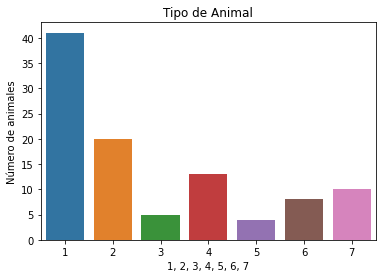

In [19]:

## 3) VISUALIZACIÓN DE LOS DATOS

# Gráfica de barras de los pacientes
sns.countplot(x='type', data=df)
plt.title('Tipo de Animal')
plt.xlabel('1, 2, 3, 4, 5, 6, 7')
plt.ylabel('Número de animales')
plt.show()


hair
Mínimo =  0
Máximo =  1


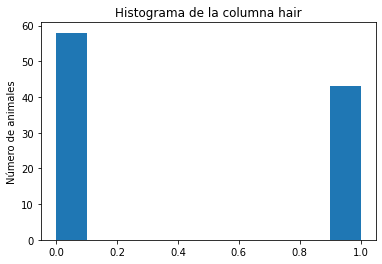

feathers
Mínimo =  0
Máximo =  1


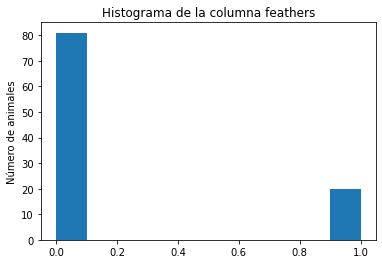

eggs
Mínimo =  0
Máximo =  1


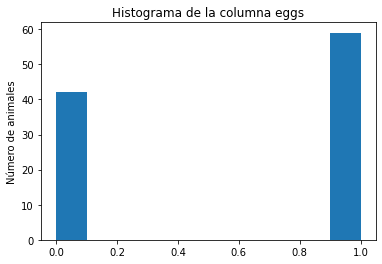

milk
Mínimo =  0
Máximo =  1


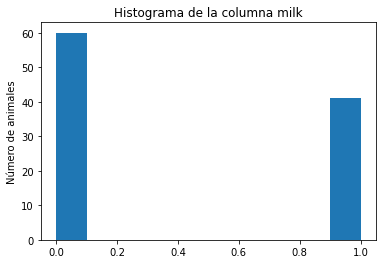

airborne
Mínimo =  0
Máximo =  1


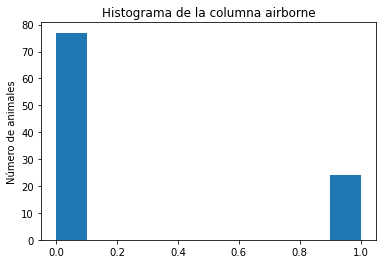

aquatic
Mínimo =  0
Máximo =  1


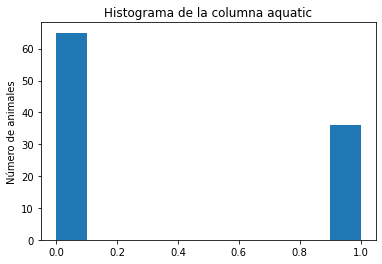

predator
Mínimo =  0
Máximo =  1


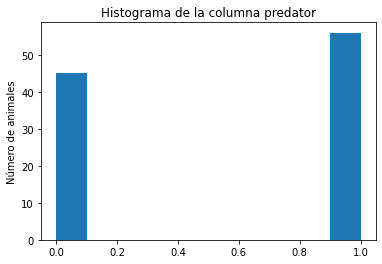

toothed
Mínimo =  0
Máximo =  1


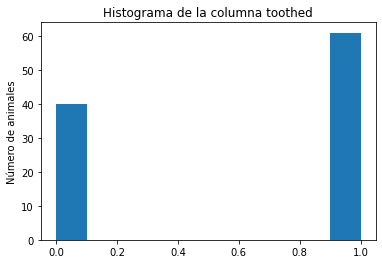

backbone
Mínimo =  0
Máximo =  1


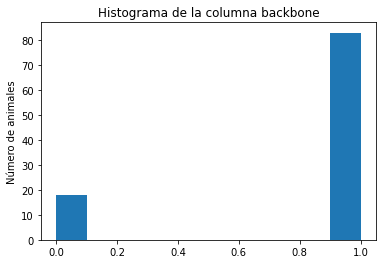

breathes
Mínimo =  0
Máximo =  1


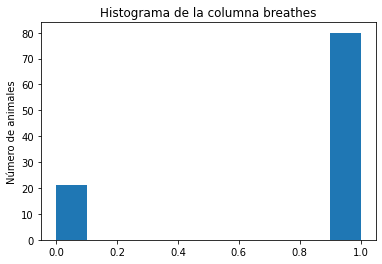

venomous
Mínimo =  0
Máximo =  1


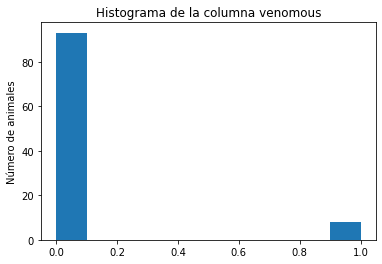

fins
Mínimo =  0
Máximo =  1


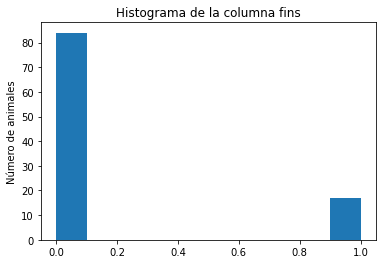

legs
Mínimo =  0
Máximo =  8


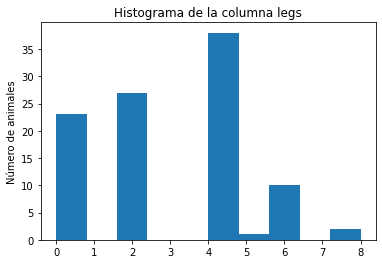

tail
Mínimo =  0
Máximo =  1


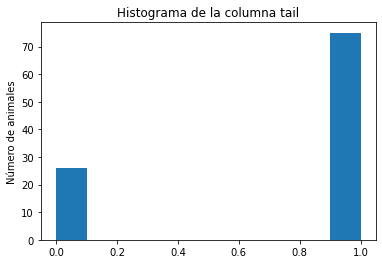

domestic
Mínimo =  0
Máximo =  1


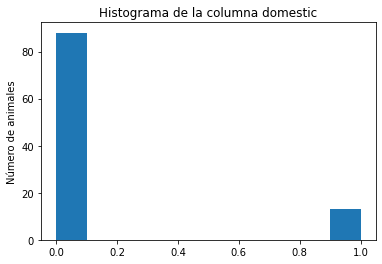

catsize
Mínimo =  0
Máximo =  1


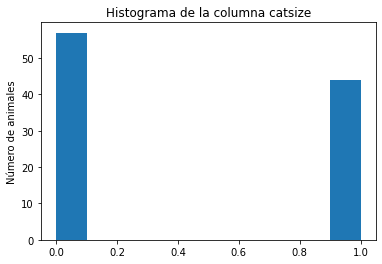

In [23]:
#Histogramas de cada columna
for i in range(0,X.shape[1]):
    print (X.columns[i])
    print('Mínimo = ',min(X.iloc[:,i]))
    print('Máximo = ',max(X.iloc[:,i]))
    plt.hist(X.iloc[:,i])
    plt.title('Histograma de la columna ' + X.columns[i])
    #plt.xlabel(descrip[i])
    plt.ylabel('Número de animales')
    plt.show()

Como podemos ver en cada una de las columnas contamos con dos opciones, por ejemplo que tenga o no pelo, si pone huevos o no, si es un depredador o no. La unica caracteristica que cuenta con más de dos opciones es el numero de piernas, que va de una a ocho. 
__hair__: Podemos ver que la mayoria de los animales cuenta con cabello.
__eggs__: La mayoria de los animales pone huevos.
__predador__: La mayoria de los animales es depredador.


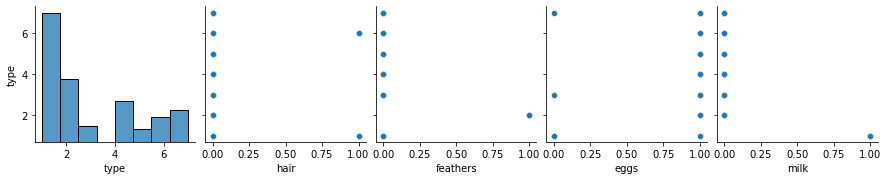

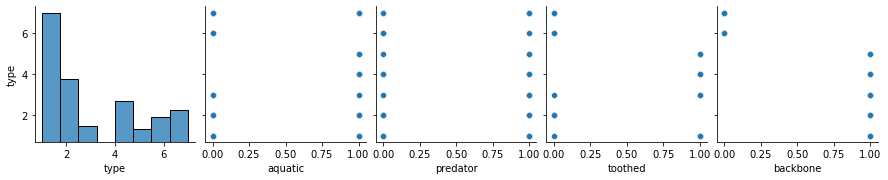

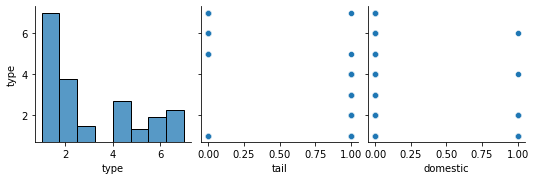

In [53]:

#Se muestra la correlación entre el tipo y algunas variables predictivas
for i in [0,5]:
    sns.pairplot(data=df,
                  y_vars=['type'],
                  x_vars=['type',X.columns[i], X.columns[i+1], X.columns[i+2],X.columns[i+3]])
    plt.show()
    
sns.pairplot(data=df,y_vars=['type'],x_vars=['type',X.columns[13], X.columns[14]])
plt.show()

A grandes rasgos podemos notar que la cantidad de animales que tienen pelo son del tipo 2, 4, 6 y las que no tienen pelo son las del tipo 1,3,5,7. Mientras que ponen huevos son 1,2,4,5,6. Por otro lado los que son acuaticos son los del tipo 1,2,3,6,7 y los otros tipos no. 

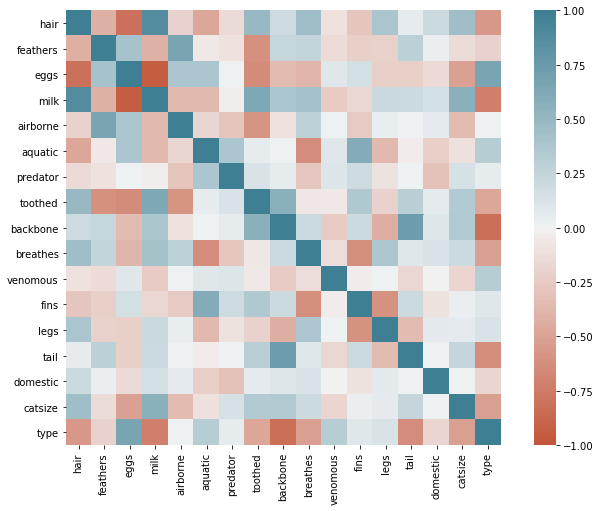

In [31]:
# Matriz de correlación
corr = df.corr()
#corr
plt.figure(figsize=(12,8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

Existe una correlación entre la variable milk y hair. Así como con las variablesbackbone y tail.

In [32]:
## 4) DIVIDIR LOS DATOS
# Se separan los datos en 2 grupos (usualmente 80% y 20%):
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2,
                                                    random_state = 0)

### Kernel lineal

In [33]:
## 5) CONSTRUIR UN MODELO
# En este ejemplo vamos a elegir el modelo SVM
SVMmodel = svm.SVC(kernel='linear') # Kernel lineal
SVMmodel.fit(X_train,Y_train)

SVC(kernel='linear')

In [34]:
## 6) PREDICCIONES
# Se hacen las predicciones con "X_test"
Y_pred = SVMmodel.predict(X_test)

In [35]:
## 7) EVALUACIÓN DEL MODELO
print('Score = ',round(SVMmodel.score(X_train, Y_train) * 100, 2),
      '% = Tasa de respuestas correctas del modelo en el conjunto de entrenamiento')
print('Accuracy = ',round(metrics.accuracy_score(Y_test, Y_pred) * 100, 2),
      '% = Tasa de respuestas correctas del modelo en el conjunto de prueba')

Score =  100.0 % = Tasa de respuestas correctas del modelo en el conjunto de entrenamiento
Accuracy =  100.0 % = Tasa de respuestas correctas del modelo en el conjunto de prueba


Text(0, 0.5, 'Número de animales')

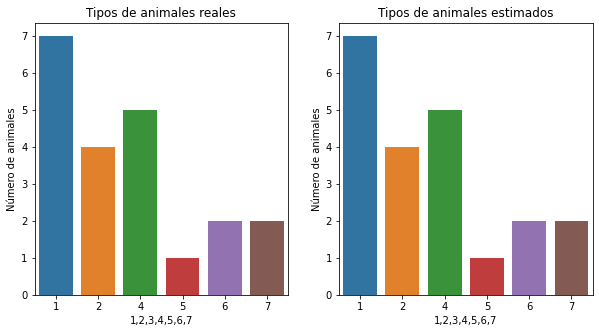

In [36]:
# Se grafican los resultados de la predicción junto con los valores reales
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)    
sns.countplot(x=Y_test, data=df)
plt.title('Tipos de animales reales')
plt.xlabel('1,2,3,4,5,6,7')
plt.ylabel('Número de animales')

plt.subplot(1,2,2)    
sns.countplot(x=Y_pred, data=df)
plt.title('Tipos de animales estimados')
plt.xlabel('1,2,3,4,5,6,7')
plt.ylabel('Número de animales')

In [37]:
#Matriz de Confusión
print(confusion_matrix(Y_test, Y_pred))

[[7 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]


Como podemos notar en la matriz no hubo ningún error, las estimaciones fueron exactas.

### Kernel polinomial

In [47]:

polinomMod = svm.SVC(kernel='poly', degree=2) # Kernel polinomial
polinomMod.fit(X_train,Y_train)
Y_pred_poli = polinomMod.predict(X_test)

print('Accuracy = ',round(metrics.accuracy_score(Y_test, Y_pred_poli) * 100, 2),
      '% = Tasa de respuestas correctas del modelo en el conjunto de prueba')

Accuracy =  95.24 % = Tasa de respuestas correctas del modelo en el conjunto de prueba


Text(0, 0.5, 'Número de animales')

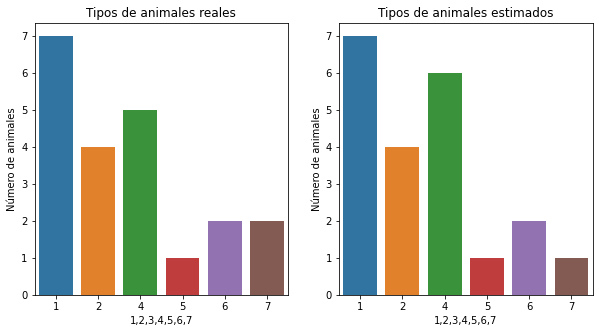

In [51]:
# Se grafican los resultados de la predicción junto con los valores reales
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)    
sns.countplot(x=Y_test, data=df)
plt.title('Tipos de animales reales')
plt.xlabel('1,2,3,4,5,6,7')
plt.ylabel('Número de animales')

plt.subplot(1,2,2)    
sns.countplot(x=Y_pred_poli, data=df)
plt.title('Tipos de animales estimados')
plt.xlabel('1,2,3,4,5,6,7')
plt.ylabel('Número de animales')


In [43]:
#Matriz de Confusión
print(confusion_matrix(Y_test, Y_pred_poli))

[[7 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 1 0 0 1]]


Ahora en el caso de la clasificacipon polinomial no fue muy exacto debido a que se cometió un error (aunque muy muy pequeño)

### Conclusiones

Para el modelo tiene opción para elegir 4 diferentes tipos de kernel, de los cuales se eligieron dos.

La tasa de respuestas correctas del modelo en el conjunto de prueba para cada uno es:

                |Kernel     |	Accuracy|
                |Lineal     |   100%    |
                |Polinomial |	95.24%  |
                
Por lo que el que mejor predice es el lineal